# Testing HilbertPlot

## 2D

In [1]:
import HilbertPlot as hp

In [2]:
n = 8
for y in reversed(range(n)):
    for x in range(n):
        num = hp.xy2d(n, x, y)
        print(f"{num:2d}",end=" ")
        #print(f"{x}{y}",end=" ")
    print('')

21 22 25 26 37 38 41 42 
20 23 24 27 36 39 40 43 
19 18 29 28 35 34 45 44 
16 17 30 31 32 33 46 47 
15 12 11 10 53 52 51 48 
14 13  8  9 54 55 50 49 
 1  2  7  6 57 56 61 62 
 0  3  4  5 58 59 60 63 


In [3]:
n = 8
for y in reversed(range(n)):
    for x in range(n):
        num = hp.xy2d(n, x, y)
        xx, yy = hp.d2xy(n, num)
        print(f"{yy:2d}",end=" ")
    print('')

 7  7  7  7  7  7  7  7 
 6  6  6  6  6  6  6  6 
 5  5  5  5  5  5  5  5 
 4  4  4  4  4  4  4  4 
 3  3  3  3  3  3  3  3 
 2  2  2  2  2  2  2  2 
 1  1  1  1  1  1  1  1 
 0  0  0  0  0  0  0  0 


## 3D

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import HilbertPlot as hp

In [5]:
n = 4
d1,d2,d3 = hp.hilbert3(n)

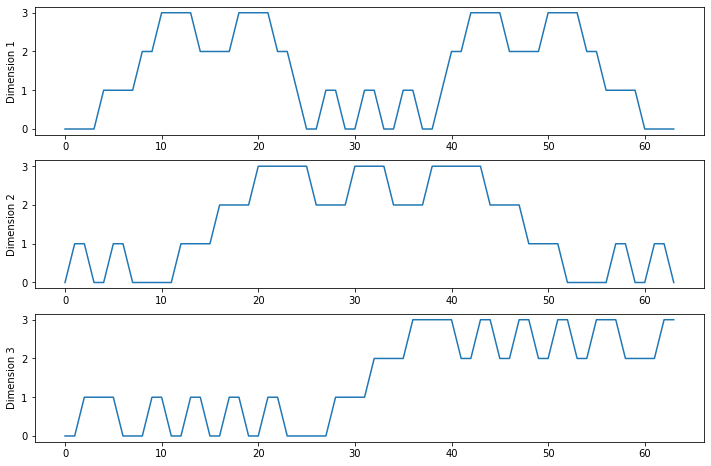

In [6]:
plt.figure(figsize=(12,8))

plt.subplot(311)
plt.plot(d1)
plt.ylabel('Dimension 1')

plt.subplot(312)
plt.plot(d2)
plt.ylabel('Dimension 2')

plt.subplot(313)
plt.plot(d3)
plt.ylabel('Dimension 3');

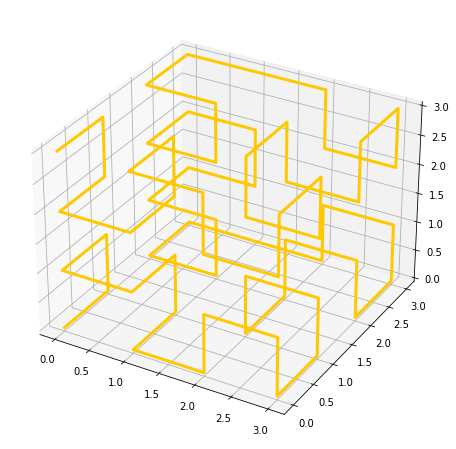

In [7]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(projection='3d')

plt.plot(d1, d2, d3, lw=3, color=plt.cm.jet(255*35//50))
#plt.axis('off')

plt.show()

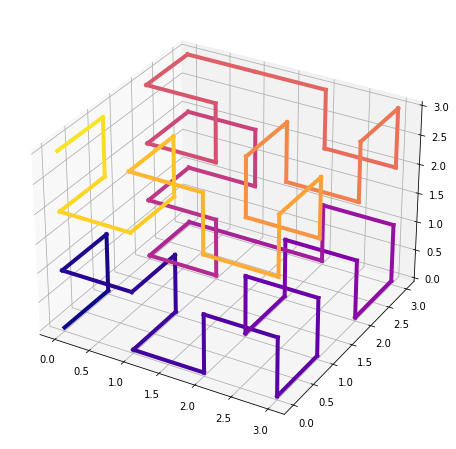

In [8]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(projection='3d')

N = n**3 + 1
for i in range(N):
    plt.plot(d1[i:i+2], d2[i:i+2], d3[i:i+2], lw=4, color=plt.cm.plasma(255*i//N))

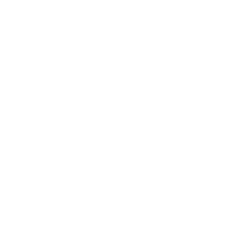

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#colour map
N = n**3 + 1
colors = [plt.cm.plasma(255*i//N) for i in range(N)]

def init():
    ax.clear()
    ax.set_xlim(0,n-1)
    ax.set_ylim(0,n-1)
    ax.set_zlim(0,n-1)
    ax.axis('off')

def update(i): 
    newsegm, = ax.plot(d1[i:i+2], d2[i:i+2], d3[i:i+2], lw=3, c=colors[i])
    
ani = animation.FuncAnimation(fig, update, init_func=init, 
                         frames = range(N), interval = 20, repeat=True)

#ani.save('tmp.gif')

### 3D index into function

In [10]:
def calculate_nm(k):
    m = 3*k
    n = 2*k
    total_lhs = (2**n)**3
    total_rhs = (2**m)**2
    assert total_lhs == total_rhs
    return (n,m,total_lhs)
calculate_nm(2)

(4, 6, 4096)

In [11]:
def fun3d(x,y,z):
    return (100.0*(y - x**2.0)**2.0 + (1 - x)**2.0 +
            100.0*(z - y**2.0)**2.0 + (1 - y)**2.0 )
#def fun3d(x,y,z):
#    return 1. * ((x**2 + y**2 + z**2) < 1)
#    return 2*x - 3*y + 4*z
#def fun3d(x,y,z):
#    t1 = (((x+0.5)**2 + (y+0.5)**2 + (z+0.5)**2) < 1)
#    t2 = (((x-0.5)**2 + (y-0.5)**2 + (z-0.5)**2) < 1)
#    return 0.66 * t1 + 0.33 * t2
#    #return 2*x - 3*y + 4*z

In [12]:
k_grid = 4
n_grid = 2**k_grid
x_ = np.linspace(-2., 2., n_grid)
y_ = np.linspace(-2., 2., n_grid)
z_ = np.linspace(-2., 2., n_grid)

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

In [13]:
f = fun3d(x, y, z)
np.size(f)

4096

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'aspect'
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'aspect'
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'aspect'


Text(0.5, 1.0, 'x-y plane')

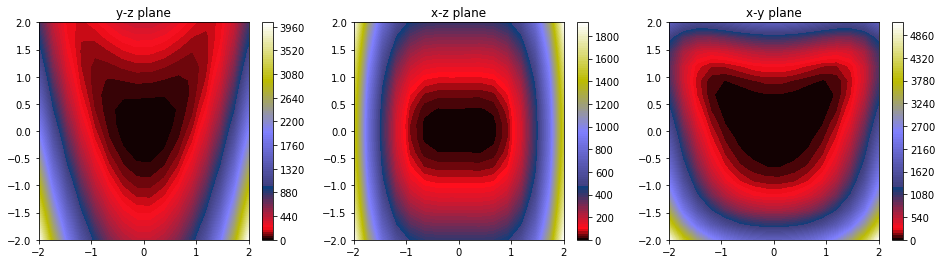

In [14]:
n_levels = 100
i_slice = n_grid // 2

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.contourf(y[i_slice,:,:],z[i_slice,:,:],f[i_slice,:,:], n_levels, 
             cmap='gist_stern', aspect='auto')
plt.colorbar()
plt.title("y-z plane")
plt.subplot(132)
plt.contourf(x[:,i_slice,:],z[:,i_slice,:],f[:,i_slice,:], n_levels, 
             cmap='gist_stern', aspect='auto')
plt.colorbar()
plt.title("x-z plane")
plt.subplot(133)
plt.contourf(x[:,:,i_slice],y[:,:,i_slice],f[:,:,i_slice], n_levels, 
             cmap='gist_stern', aspect='auto')
plt.colorbar()
plt.title("x-y plane")

#plt.savefig("test6-3d-function.png", dpi=300)

In [15]:
d1,d2,d3 = hp.hilbert3(n_grid)

In [16]:
fval = [fun3d(x_[d1[i]], y_[d2[i]], z_[d3[i]]) for i in range(len(d1))]
#fval = np.linspace(0,1,np.size(fval))

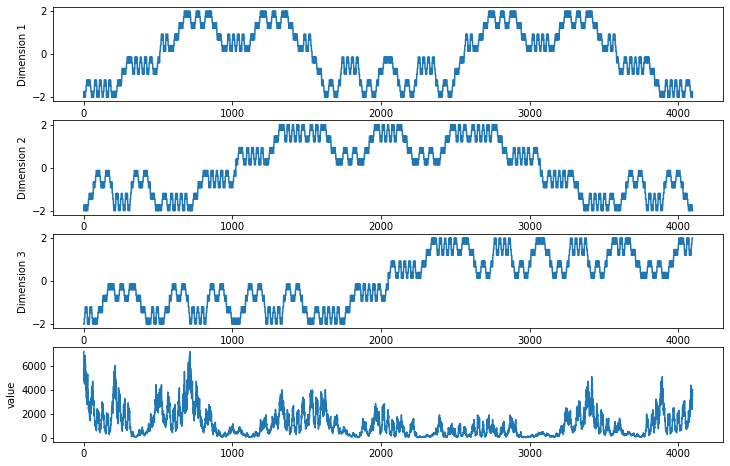

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(x_[d1])
plt.ylabel('Dimension 1')

plt.subplot(412)
plt.plot(y_[d2])
plt.ylabel('Dimension 2')

plt.subplot(413)
plt.plot(z_[d3])
plt.ylabel('Dimension 3')

plt.subplot(414)
plt.plot(fval)
plt.ylabel('value');

In [18]:
k_2d = 6
n_2d = 2**k_2d
n_square = n_2d**2

In [19]:
f_2d = np.zeros((n_2d,n_2d))
for y in range(n_2d):
    for x in range(n_2d):
        di = hp.xy2d(n_2d, x, y)
        f_2d[x, y] = fval[di]

Text(0.5, 1.0, '3D to 2D Hilbert plot')

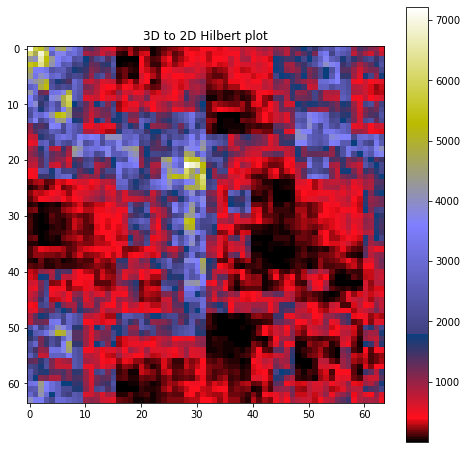

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(f_2d, cmap='gist_stern')
plt.colorbar()
plt.title("3D to 2D Hilbert plot")

#plt.savefig("test6-3d-2d-HilbertPlot.png", dpi=300)